In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statistics as stat

In [4]:
data={'name':['raja','ranjith','karthi','pradeep','virat','rakshi','rakesh','ragasudha','mohananya','keerthana'],
       'age':[25,29,26,35,32,25,27,29,31,44],
       'gender':['m','m','m','m','m','f','m','f','f','f'],
       'designation':['Soft.Engineer','Tech. Lead','Soft.Analyst','CFO',
                       'Soft.Analyst','Tech. Lead','Sr. Soft. Engineer',
                       'Sr. Soft. Engineer','Soft. Engineer','Tech. Architect'],
        'salary':[20000,50000,150000,100000,15000,50000,25000,25000,20000,70000]}

In [5]:
data

{'name': ['raja',
  'ranjith',
  'karthi',
  'pradeep',
  'virat',
  'rakshi',
  'rakesh',
  'ragasudha',
  'mohananya',
  'keerthana'],
 'age': [25, 29, 26, 35, 32, 25, 27, 29, 31, 44],
 'gender': ['m', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f'],
 'designation': ['Soft.Engineer',
  'Tech. Lead',
  'Soft.Analyst',
  'CFO',
  'Soft.Analyst',
  'Tech. Lead',
  'Sr. Soft. Engineer',
  'Sr. Soft. Engineer',
  'Soft. Engineer',
  'Tech. Architect'],
 'salary': [20000,
  50000,
  150000,
  100000,
  15000,
  50000,
  25000,
  25000,
  20000,
  70000]}

In [6]:
data.keys()

dict_keys(['name', 'age', 'gender', 'designation', 'salary'])

In [7]:
data.values()

dict_values([['raja', 'ranjith', 'karthi', 'pradeep', 'virat', 'rakshi', 'rakesh', 'ragasudha', 'mohananya', 'keerthana'], [25, 29, 26, 35, 32, 25, 27, 29, 31, 44], ['m', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f'], ['Soft.Engineer', 'Tech. Lead', 'Soft.Analyst', 'CFO', 'Soft.Analyst', 'Tech. Lead', 'Sr. Soft. Engineer', 'Sr. Soft. Engineer', 'Soft. Engineer', 'Tech. Architect'], [20000, 50000, 150000, 100000, 15000, 50000, 25000, 25000, 20000, 70000]])

In [8]:
data['name']

['raja',
 'ranjith',
 'karthi',
 'pradeep',
 'virat',
 'rakshi',
 'rakesh',
 'ragasudha',
 'mohananya',
 'keerthana']

In [9]:
data['name'][0]

'raja'

In [10]:
'kumar' in data

False

In [11]:
'age' in data

True

In [15]:
datafrm=pd.DataFrame(data,columns=['name','age','gender','designation','salary'])

In [27]:
datafrm

,name,age,gender,designation,salary
0,raja,25,m,Soft.Engineer,20000
1,ranjith,29,m,Tech. Lead,50000
2,karthi,26,m,Soft.Analyst,150000
3,pradeep,35,m,CFO,100000
4,virat,32,m,Soft.Analyst,15000
5,rakshi,25,f,Tech. Lead,50000
6,rakesh,27,m,Sr. Soft. Engineer,25000
7,ragasudha,29,f,Sr. Soft. Engineer,25000
8,mohananya,31,f,Soft. Engineer,20000
9,keerthana,44,f,Tech. Architect,70000


In [28]:
p_Table = pd.pivot_table(datafrm,index=['gender','designation'])

In [29]:
p_Table

age  salary
gender designation                    
f      Soft. Engineer       31   20000
       Sr. Soft. Engineer   29   25000
       Tech. Architect      44   70000
       Tech. Lead           25   50000
m      CFO                  35  100000
       Soft.Analyst         29   82500
       Soft.Engineer        25   20000
       Sr. Soft. Engineer   27   25000
       Tech. Lead           29   50000

In [34]:
pd.crosstab(index=datafrm['gender'],columns='count')

col_0,count
gender,
f,4
m,6


In [38]:
stat.median(datafrm.salary)

37500.0

In [39]:
datafrm['salary'].median()

37500.0

In [40]:
datafrm['salary'].mean()

52500.0

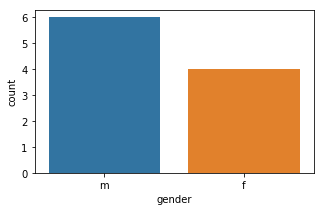

In [57]:
#Data Visualization
#Count Plot
fig=plt.figure(figsize=(5,3))
sns.countplot(x='gender',data=datafrm)

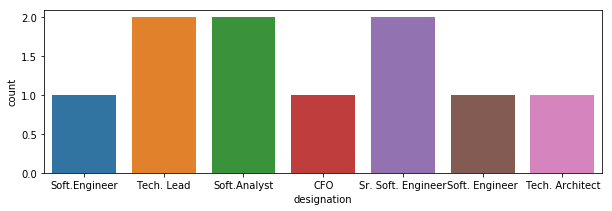

In [60]:
fig=plt.figure(figsize=(10,3))
sns.countplot(x='designation',data=datafrm)

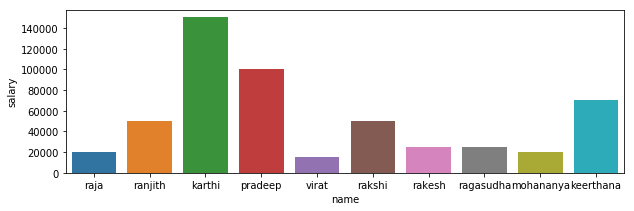

In [66]:
fig=plt.figure(figsize=(10,3))
sns.barplot(x='name',y='salary',data=datafrm)

In [68]:
#Checking for missing values
datafrm.isna().sum()  #No Missing Values

name           0
age            0
gender         0
designation    0
salary         0
dtype: int64

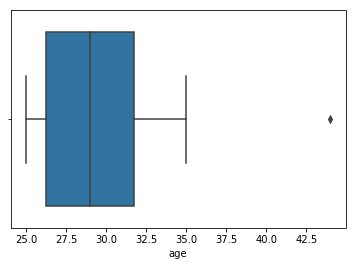

In [73]:
#Checking for outliers
sns.boxplot(x=datafrm.age)


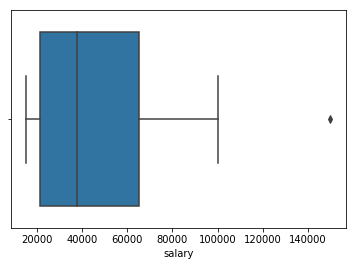

In [74]:
sns.boxplot(x=datafrm.salary)

In [75]:
data_salary_Q1 = datafrm['salary'].quantile(0.25)

In [76]:
data_salary_Q1

21250.0

In [77]:
data_salary_Q3 = datafrm['salary'].quantile(0.75)

In [78]:
data_salary_Q3 

65000.0

In [79]:
data_salary_IQR = data_salary_Q3 - data_salary_Q1

In [80]:
data_salary_IQR 

43750.0

In [81]:
print(data_salary_Q1,data_salary_Q3,data_salary_IQR)


21250.0 65000.0 43750.0


In [83]:
datafrm = datafrm[~((datafrm.salary<
                     (data_salary_Q1-1.5*data_salary_IQR))|(datafrm.salary>(data_salary_Q3+1.5*data_salary_IQR)))]

In [86]:
datafrm

,name,age,gender,designation,salary
0,raja,25,m,Soft.Engineer,20000
1,ranjith,29,m,Tech. Lead,50000
3,pradeep,35,m,CFO,100000
4,virat,32,m,Soft.Analyst,15000
5,rakshi,25,f,Tech. Lead,50000
6,rakesh,27,m,Sr. Soft. Engineer,25000
7,ragasudha,29,f,Sr. Soft. Engineer,25000
8,mohananya,31,f,Soft. Engineer,20000
9,keerthana,44,f,Tech. Architect,70000


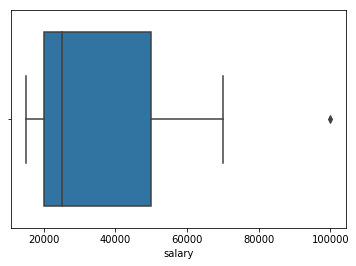

In [87]:
sns.boxplot(x=datafrm['salary'])
#We don't want to remove as pradeep is CFO and has correct salary

In [88]:
#One hot Encoding
datafrm = pd.get_dummies(datafrm)

In [89]:
datafrm

,age,salary,name_keerthana,name_mohananya,name_pradeep,name_ragasudha,name_raja,name_rakesh,name_rakshi,name_ranjith,name_virat,gender_f,gender_m,designation_CFO,designation_Soft. Engineer,designation_Soft.Analyst,designation_Soft.Engineer,designation_Sr. Soft. Engineer,designation_Tech. Architect,designation_Tech. Lead
0,25,20000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,29,50000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,35,100000,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,32,15000,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
5,25,50000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
6,27,25000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
7,29,25000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8,31,20000,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,44,70000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [95]:
#Checking for normality using shapiro-wilk test
stat,p = shapiro(datafrm)

In [96]:
stat,p 

(0.193891704082489, 2.899103115658084e-27)

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


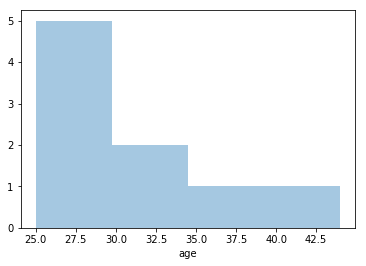

In [98]:
sns.distplot(datafrm['age'],kde=False)


C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


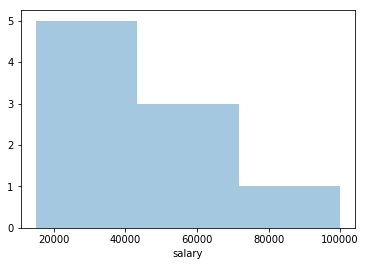

In [100]:
sns.distplot(datafrm['salary'],kde=False)


In [102]:
from scipy.stats import skew
print(round(skew(datafrm['age']),2)) 

1.23


In [104]:
print(round(skew(datafrm['salary']),2))

0.98


In [107]:
a=datafrm.corr()

In [113]:
a.head()

,age,salary,name_keerthana,name_mohananya,name_pradeep,name_ragasudha,name_raja,name_rakesh,name_rakshi,name_ranjith,name_virat,gender_f,gender_m,designation_CFO,designation_Soft. Engineer,designation_Soft.Analyst,designation_Soft.Engineer,designation_Sr. Soft. Engineer,designation_Tech. Architect,designation_Tech. Lead
age,1.000000,0.543688,0.835793,0.014047,0.266892,-0.112376,-0.365220,-0.238798,-0.365220,-0.112376,0.077258,0.235428,-0.235428,0.266892,0.014047,0.077258,-0.365220,-0.265462,0.835793,-0.361029
salary,0.543688,1.000000,0.371324,-0.283954,0.764491,-0.218426,-0.283954,-0.218426,0.109213,0.109213,-0.349482,-0.013814,0.013814,0.764491,-0.283954,-0.349482,-0.283954,-0.330229,0.371324,0.165115
name_keerthana,0.835793,0.371324,1.000000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.395285,-0.395285,-0.125000,-0.125000,-0.125000,-0.125000,-0.188982,1.000000,-0.188982
name_mohananya,0.014047,-0.283954,-0.125000,1.000000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.395285,-0.395285,-0.125000,1.000000,-0.125000,-0.125000,-0.188982,-0.125000,-0.188982
name_pradeep,0.266892,0.764491,-0.125000,-0.125000,1.000000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.316228,0.316228,1.000000,-0.125000,-0.125000,-0.125000,-0.188982,-0.125000,-0.188982


In [115]:
#Normalizing the data
print(round(skew(np.log10(datafrm.age)),2))

0.9


In [116]:
print(round(skew(np.log10(datafrm.salary)),2))

0.36


In [120]:
#Applying log transformation to the continuous column
datafrm['age'] = np.log10(datafrm['age'])

In [121]:
datafrm['age']

0    1.397940
1    1.462398
3    1.544068
4    1.505150
5    1.397940
6    1.431364
7    1.462398
8    1.491362
9    1.643453
Name: age, dtype: float64

In [122]:
datafrm['salary'] = np.log10(datafrm['salary'])

In [123]:
datafrm['salary']

0    4.301030
1    4.698970
3    5.000000
4    4.176091
5    4.698970
6    4.397940
7    4.397940
8    4.301030
9    4.845098
Name: salary, dtype: float64

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


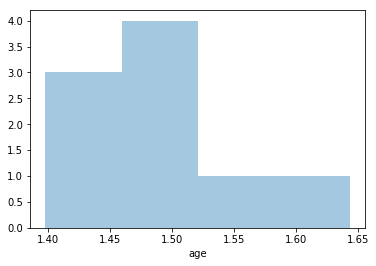

In [125]:
sns.distplot(datafrm['age'],kde=False)


C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


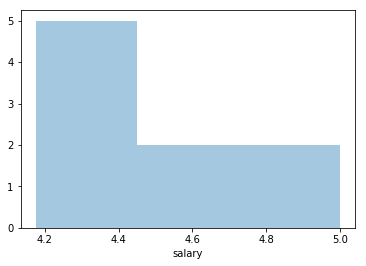

In [127]:
sns.distplot(datafrm['salary'],kde=False)
